In [26]:
# Import dependencies
import pandas as pd
from pathlib import Path
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [27]:
# Read in the CSV file as a Pandas DataFrame

data_df = pd.read_csv(
    Path("data/Most-Recent-Cohorts-Field-of-Study.csv")
)

# Review the DataFrame
data_df.head()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT1,...,BBRR4_FED_COMP_N,BBRR4_FED_COMP_DFLT,BBRR4_FED_COMP_DLNQ,BBRR4_FED_COMP_FBR,BBRR4_FED_COMP_DFR,BBRR4_FED_COMP_NOPROG,BBRR4_FED_COMP_MAKEPROG,BBRR4_FED_COMP_PAIDINFULL,BBRR4_FED_COMP_DISCHARGE,DISTANCE
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelor's Degree,NaN,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0
1,100654.0,1002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelor's Degree,NaN,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,0
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelor's Degree,6.0,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelor's Degree,7.0,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,8.0,...,12,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,1


In [28]:
#select columns to keeps
desired_columns = ['UNITID', 'CIPCODE', 'CREDLEV','DEBT_ALL_STGP_ANY_MEAN', 'EARN_MDN_HI_1YR', 'EARN_MDN_HI_2YR', 'EARN_NE_MDN_3YR','EARN_CNTOVER150_3YR','EARN_COUNT_NE_3YR']
only_cols = data_df.loc[:, desired_columns]

only_cols.head()

,UNITID,CIPCODE,CREDLEV,DEBT_ALL_STGP_ANY_MEAN,EARN_MDN_HI_1YR,EARN_MDN_HI_2YR,EARN_NE_MDN_3YR,EARN_CNTOVER150_3YR,EARN_COUNT_NE_3YR
0,100654.0,100,3,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
1,100654.0,101,3,PrivacySuppressed,NaN,NaN,NaN,NaN,NaN
2,100654.0,109,3,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
3,100654.0,110,3,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
4,100654.0,110,5,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed


In [29]:
only_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233979 entries, 0 to 233978
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   UNITID                  222299 non-null  float64
 1   CIPCODE                 233979 non-null  int64  
 2   CREDLEV                 233979 non-null  int64  
 3   DEBT_ALL_STGP_ANY_MEAN  233979 non-null  object 
 4   EARN_MDN_HI_1YR         217880 non-null  object 
 5   EARN_MDN_HI_2YR         213154 non-null  object 
 6   EARN_NE_MDN_3YR         217880 non-null  object 
 7   EARN_CNTOVER150_3YR     217880 non-null  object 
 8   EARN_COUNT_NE_3YR       217880 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 16.1+ MB


In [30]:
#drop NA values
column_names = ['UNITID', 'CIPCODE', 'CREDLEV','DEBT_ALL_STGP_ANY_MEAN', 'EARN_MDN_HI_1YR', 'EARN_MDN_HI_2YR', 'EARN_NE_MDN_3YR','EARN_CNTOVER150_3YR','EARN_COUNT_NE_3YR']

# Initialize the DataFrame 'cleaned_df' as a copy of 'only_cols'
cleaned_df = only_cols.copy()

# Iterate through the specified columns and drop rows with NaN values in each column
for col in column_names:
    cleaned_df = cleaned_df[cleaned_df[col].notna()]


In [31]:
cleaned_df = cleaned_df [cleaned_df ['EARN_CNTOVER150_3YR'] != 'PrivacySuppressed']
cleaned_df = cleaned_df [cleaned_df ['EARN_COUNT_NE_3YR'] != 'PrivacySuppressed']
cleaned_df = cleaned_df [cleaned_df ['DEBT_ALL_STGP_ANY_MEAN'] != 'PrivacySuppressed']
cleaned_df = cleaned_df [cleaned_df ['EARN_MDN_HI_1YR'] != 'PrivacySuppressed']
cleaned_df = cleaned_df [cleaned_df ['EARN_MDN_HI_2YR'] != 'PrivacySuppressed']
cleaned_df = cleaned_df [cleaned_df ['EARN_NE_MDN_3YR'] != 'PrivacySuppressed']

cleaned_df.head()

,UNITID,CIPCODE,CREDLEV,DEBT_ALL_STGP_ANY_MEAN,EARN_MDN_HI_1YR,EARN_MDN_HI_2YR,EARN_NE_MDN_3YR,EARN_CNTOVER150_3YR,EARN_COUNT_NE_3YR
39,100654.0,2401,3,32054,23094,24615,30613,17,25
66,100663.0,901,3,26312,28940,29517,33859,71,92
89,100663.0,1313,3,24668,30620,29882,33214,46,55
108,100663.0,1419,3,24556,63241,59253,73433,33,34
117,100663.0,2301,3,25487,27282,27497,25437,24,37


In [32]:
cleaned_df.nunique()

UNITID                     3893
CIPCODE                     276
CREDLEV                       4
DEBT_ALL_STGP_ANY_MEAN    12019
EARN_MDN_HI_1YR           13930
EARN_MDN_HI_2YR            4663
EARN_NE_MDN_3YR           14187
EARN_CNTOVER150_3YR         584
EARN_COUNT_NE_3YR           749
dtype: int64

In [33]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20585 entries, 39 to 222298
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNITID                  20585 non-null  float64
 1   CIPCODE                 20585 non-null  int64  
 2   CREDLEV                 20585 non-null  int64  
 3   DEBT_ALL_STGP_ANY_MEAN  20585 non-null  object 
 4   EARN_MDN_HI_1YR         20585 non-null  object 
 5   EARN_MDN_HI_2YR         20585 non-null  object 
 6   EARN_NE_MDN_3YR         20585 non-null  object 
 7   EARN_CNTOVER150_3YR     20585 non-null  object 
 8   EARN_COUNT_NE_3YR       20585 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.6+ MB


In [34]:
#change COMPL data type from object to float
columns_to_convert = ['DEBT_ALL_STGP_ANY_MEAN', 'EARN_MDN_HI_1YR', 'EARN_MDN_HI_2YR', 'EARN_NE_MDN_3YR', 'EARN_CNTOVER150_3YR', 'EARN_COUNT_NE_3YR']
cleaned_df[columns_to_convert] = cleaned_df[columns_to_convert].astype(float)
cleaned_df.head()

,UNITID,CIPCODE,CREDLEV,DEBT_ALL_STGP_ANY_MEAN,EARN_MDN_HI_1YR,EARN_MDN_HI_2YR,EARN_NE_MDN_3YR,EARN_CNTOVER150_3YR,EARN_COUNT_NE_3YR
39,100654.0,2401,3,32054.0,23094.0,24615.0,30613.0,17.0,25.0
66,100663.0,901,3,26312.0,28940.0,29517.0,33859.0,71.0,92.0
89,100663.0,1313,3,24668.0,30620.0,29882.0,33214.0,46.0,55.0
108,100663.0,1419,3,24556.0,63241.0,59253.0,73433.0,33.0,34.0
117,100663.0,2301,3,25487.0,27282.0,27497.0,25437.0,24.0,37.0


In [35]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20585 entries, 39 to 222298
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNITID                  20585 non-null  float64
 1   CIPCODE                 20585 non-null  int64  
 2   CREDLEV                 20585 non-null  int64  
 3   DEBT_ALL_STGP_ANY_MEAN  20585 non-null  float64
 4   EARN_MDN_HI_1YR         20585 non-null  float64
 5   EARN_MDN_HI_2YR         20585 non-null  float64
 6   EARN_NE_MDN_3YR         20585 non-null  float64
 7   EARN_CNTOVER150_3YR     20585 non-null  float64
 8   EARN_COUNT_NE_3YR       20585 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.6 MB


In [36]:
Nan_values = cleaned_df.isna().sum()
Nan_values

UNITID                    0
CIPCODE                   0
CREDLEV                   0
DEBT_ALL_STGP_ANY_MEAN    0
EARN_MDN_HI_1YR           0
EARN_MDN_HI_2YR           0
EARN_NE_MDN_3YR           0
EARN_CNTOVER150_3YR       0
EARN_COUNT_NE_3YR         0
dtype: int64

In [37]:
len(cleaned_df)

20585

In [38]:
cleaned_df['employment_rate'] = cleaned_df['EARN_CNTOVER150_3YR'] / cleaned_df['EARN_COUNT_NE_3YR']
cleaned_df.head()

,UNITID,CIPCODE,CREDLEV,DEBT_ALL_STGP_ANY_MEAN,EARN_MDN_HI_1YR,EARN_MDN_HI_2YR,EARN_NE_MDN_3YR,EARN_CNTOVER150_3YR,EARN_COUNT_NE_3YR,employment_rate
39,100654.0,2401,3,32054.0,23094.0,24615.0,30613.0,17.0,25.0,0.680000
66,100663.0,901,3,26312.0,28940.0,29517.0,33859.0,71.0,92.0,0.771739
89,100663.0,1313,3,24668.0,30620.0,29882.0,33214.0,46.0,55.0,0.836364
108,100663.0,1419,3,24556.0,63241.0,59253.0,73433.0,33.0,34.0,0.970588
117,100663.0,2301,3,25487.0,27282.0,27497.0,25437.0,24.0,37.0,0.648649


In [39]:
cleaned_df['rate_over85'] = cleaned_df['employment_rate'].apply(lambda x: 1 if x > 0.85 else 0)

cleaned_df.head()

,UNITID,CIPCODE,CREDLEV,DEBT_ALL_STGP_ANY_MEAN,EARN_MDN_HI_1YR,EARN_MDN_HI_2YR,EARN_NE_MDN_3YR,EARN_CNTOVER150_3YR,EARN_COUNT_NE_3YR,employment_rate,rate_over85
39,100654.0,2401,3,32054.0,23094.0,24615.0,30613.0,17.0,25.0,0.680000,0
66,100663.0,901,3,26312.0,28940.0,29517.0,33859.0,71.0,92.0,0.771739,0
89,100663.0,1313,3,24668.0,30620.0,29882.0,33214.0,46.0,55.0,0.836364,0
108,100663.0,1419,3,24556.0,63241.0,59253.0,73433.0,33.0,34.0,0.970588,1
117,100663.0,2301,3,25487.0,27282.0,27497.0,25437.0,24.0,37.0,0.648649,0


In [40]:
#cleaned_df.to_csv('cleaned_data-3.csv')

In [41]:
y = cleaned_df["rate_over85"]
X = cleaned_df.drop(columns=["rate_over85"])

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(15438, 10)

In [43]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

In [44]:
classifier.fit(X_train, y_train)

C:\Users\atoth\.conda\envs\dev\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=1)

In [45]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9884052338385801
Testing Data Score: 0.9852341169613367


In [46]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,1,1
6,0,0
7,1,1
8,0,0
9,1,1


In [47]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.9852341169613367

In [48]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!
training_matrix = confusion_matrix(y_test, predictions)
training_matrix

array([[3765,   42],
       [  34, 1306]], dtype=int64)

In [49]:
# Print the classification report for the model
# YOUR CODE HERE!
target_names = ["0_rate_less_than_85", "1_rate_over_than_85"]
print(classification_report(y_test, predictions, target_names=target_names))

                     precision    recall  f1-score   support

0_rate_less_than_85       0.99      0.99      0.99      3807
1_rate_over_than_85       0.97      0.97      0.97      1340

           accuracy                           0.99      5147
          macro avg       0.98      0.98      0.98      5147
       weighted avg       0.99      0.99      0.99      5147



In [53]:
print(cleaned_df.columns)

Index(['UNITID', 'CIPCODE', 'CREDLEV', 'DEBT_ALL_STGP_ANY_MEAN',
       'EARN_MDN_HI_1YR', 'EARN_MDN_HI_2YR', 'EARN_NE_MDN_3YR',
       'EARN_CNTOVER150_3YR', 'EARN_COUNT_NE_3YR', 'employment_rate',
       'rate_over85'],
      dtype='object')


C:\Users\atoth\AppData\Local\Temp\ipykernel_28504\2885080071.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(degree_labels)


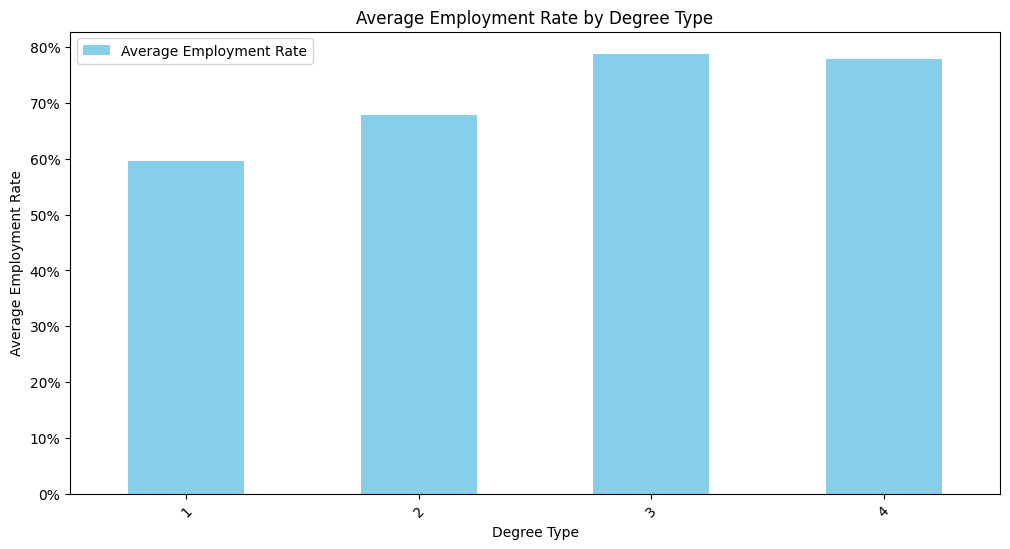

In [66]:
import matplotlib.pyplot as plt

# Map degree codes to degree names
degree_names = {
    1: 'Certificate',
    2: "Associate's Degree",
    3: "Bachelor's Degree",
    4: "Post-baccalaureate Certificate"
}

# Group the data by degree and calculate the average employment rate
degree_groups = cleaned_df.groupby('CREDLEV')['employment_rate'].mean()

# Create a list of degree names based on the degree codes
degree_labels = [degree_names[code] for code in degree_groups.index]

# Plot the average employment rates for each degree
plt.figure(figsize=(12, 6))
degree_groups.plot(kind='bar', color='skyblue')
plt.title('Average Employment Rate by Degree Type')
plt.xlabel('Degree Type')
plt.ylabel('Average Employment Rate')

# Replace the y-axis labels with degree names
plt.gca().set_yticklabels(degree_labels)

# Format y-axis labels as needed (e.g., with larger numbers)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

plt.xticks(rotation=45)

# Add a legend
plt.legend(['Average Employment Rate'])

plt.show()


In [67]:
cleaned_df.to_csv('cleaned_data-2.csv')

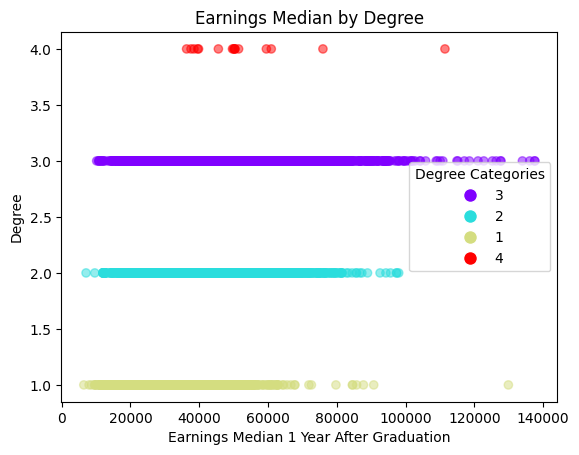

In [89]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Define a colormap with unique colors for each degree category
degree_colors = cm.rainbow(np.linspace(0, 1, len(cleaned_df['CREDLEV'].unique())))

# Create a dictionary to map degrees to colors
degree_color_mapping = {degree: color for degree, color in zip(cleaned_df['CREDLEV'].unique(), degree_colors)}

# Create a list of colors corresponding to each data point's degree
data_colors = [degree_color_mapping[degree] for degree in cleaned_df['CREDLEV']]

# Create the scatter plot using the specified colors
scatter = plt.scatter(cleaned_df['EARN_MDN_HI_1YR'], cleaned_df['CREDLEV'], alpha=0.5, c=data_colors)

# Add a legend to show the degree categories
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=degree_color_mapping[degree], markersize=10, label=degree) for degree in cleaned_df['CREDLEV'].unique()]
plt.legend(handles=handles, title='Degree Categories')

plt.xlabel('Earnings Median 1 Year After Graduation')
plt.ylabel('Degree')
plt.title('Earnings Median by Degree')
plt.show()


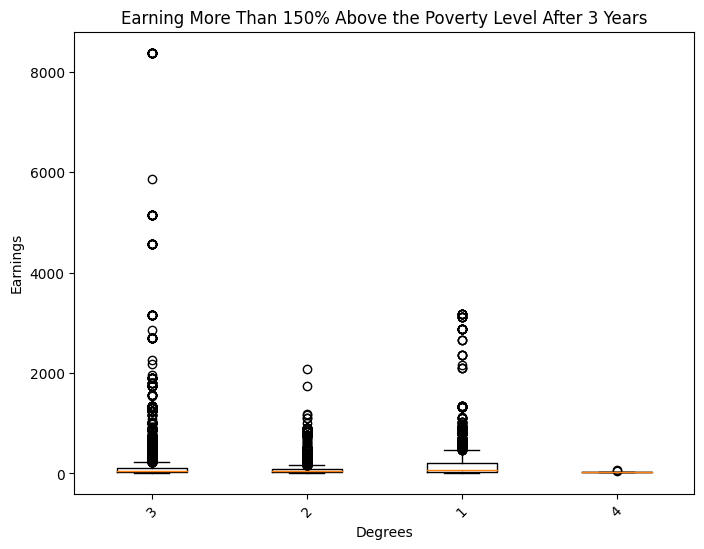

In [99]:
plt.figure(figsize=(8, 6))
plt.boxplot([cleaned_df[cleaned_df['CREDLEV'] == level]['EARN_CNTOVER150_3YR'] for level in cleaned_df['CREDLEV'].unique()])
plt.xlabel('Degrees')
plt.ylabel('Earnings')
plt.title('Earning More Than 150% Above the Poverty Level After 3 Years')
plt.xticks(range(1, len(cleaned_df['CREDLEV'].unique()) + 1), cleaned_df['CREDLEV'].unique(), rotation=45)
plt.show()